In [6]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.8MB 40.1MB/s 
     |████████████████████████████████| 450kB 44.4MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
ERROR: tensorboard 2.1.0 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstal

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.reuters.load_data(num_words=10000)

In [0]:
word_index = tf.keras.datasets.reuters.get_word_index()
word_index = dict([(value, key) for key, value in word_index.items()])
unq = len(np.unique(np.array(train_y)))
train_y = tf.one_hot(train_y, unq)
test_y = tf.one_hot(test_y, unq)

In [210]:
# dumy = train_x[0]
news = ' '.join([word_index.get(i-3,'?') for i in train_x[2]])
print(news)

? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in ? corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national ? inc of 11 8 mln and ? corp of 15 6 mln reuter 3


In [0]:
def vectorize_sequence(sequences, dimension = 10000):
  result = np.zeros((len(sequences), dimension))
  for i, seqence in enumerate(sequences):
    result[i, seqence] = 1
  return result

In [0]:
train_x = vectorize_sequence(train_x).astype('float')
test_x = vectorize_sequence(test_x).astype('float')


In [0]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(40, activation=tf.nn.relu, input_shape=(10000,)))
network.add(tf.keras.layers.Dense(46, activation=tf.nn.relu))
network.add(tf.keras.layers.Dense(46, activation=tf.nn.softmax))

In [0]:
#@title Default title text
v_train_x, train_x = train_x[:2000], train_x[2000:]
v_train_y, train_y = train_y[:2000], train_y[2000:]

In [0]:
network.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [216]:
history = network.fit(train_x, train_y, epochs=5, batch_size=512, validation_data=(v_train_x, v_train_y))

Train on 6982 samples, validate on 2000 samples
Epoch 1/5
6982/6982 [==============================] - 1s 174us/sample - loss: 3.0551 - accuracy: 0.5010 - val_loss: 2.2451 - val_accuracy: 0.6080
Epoch 2/5
6982/6982 [==============================] - 1s 109us/sample - loss: 1.8359 - accuracy: 0.6651 - val_loss: 1.6428 - val_accuracy: 0.6665
Epoch 3/5
6982/6982 [==============================] - 1s 111us/sample - loss: 1.3334 - accuracy: 0.7259 - val_loss: 1.4038 - val_accuracy: 0.6955
Epoch 4/5
6982/6982 [==============================] - 1s 111us/sample - loss: 1.0701 - accuracy: 0.7747 - val_loss: 1.2623 - val_accuracy: 0.7225
Epoch 5/5
6982/6982 [==============================] - 1s 106us/sample - loss: 0.8940 - accuracy: 0.8075 - val_loss: 1.1896 - val_accuracy: 0.7345


In [217]:
network.evaluate(test_x, test_y)

2246/2246 [==============================] - 0s 126us/sample - loss: 1.1893 - accuracy: 0.7351


[1.1892581644168627, 0.7350846]

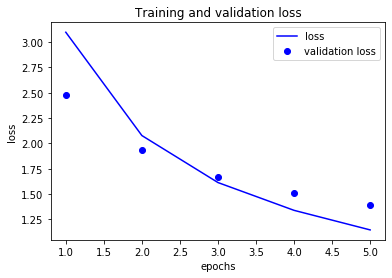

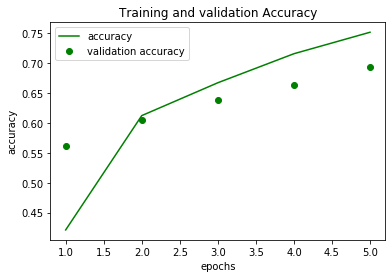

<Figure size 432x288 with 0 Axes>

In [206]:
hist_dict = history.history
epochs = range(1,len(hist_dict['loss'])+1)
plt.plot(epochs, hist_dict['loss'], 'b', label='loss')
plt.plot(epochs, hist_dict['val_loss'], 'bo', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()


plt.plot(epochs, hist_dict['accuracy'], 'g', label='accuracy')
plt.plot(epochs, hist_dict['val_accuracy'], 'go', label='validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.clf()